<img src="../../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

## _*Entangled Measurement*_ 

The latest version of this notebook is available on https://github.com/QISKit/qiskit-tutorial.


***
### Contributors
Ikko Hamamura

## 1. Entanglement of Observable

Entanglement of quantum states is a key concept in quantum world.
The entanglement was introduced in [Superposition and Entanglement](../../reference/qis/superposition_and_entanglement.ipynb) and deepened in [Entanglement Revisited](../../reference/qis/entanglement_revisited.ipynb).
The Bell state $\left(\left|00\right\rangle+\left|11\right\rangle\right)/\sqrt{2}$ shows perfect correlations for any basis measurement.
This nonlocal correlation is a resource of quantum information processing including a quantum computer.
If you want to decide whether a given quantum state is entangled or not, [Bell-CHSH inequality](http://localhost:8888/notebooks/reference/qis/entanglement_revisited.ipynb#CHSH-Inequality-) is useful.
The violation of the Bell-CHSH inequality implies that the state is entangled.

On the other hand, there is entanglement of quantum observables.
In this tutorial, we will show the detection way of the entanglement of measurement.
More specifically, we use dual version of Bell-CHSH inequality proposed in [here](https://arxiv.org/abs/1709.07987) to detect entanglement of observables.
This is an inverse process of original one.

In [1]:
#Imports
from itertools import product
import matplotlib.pyplot as plt
%matplotlib inline

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Result
from qiskit import available_backends, get_backend, execute, register, least_busy
from qiskit.tools.visualization import matplotlib_circuit_drawer, qx_color_scheme #require qiskit>0.5.5
%config InlineBackend.figure_format = 'svg'
style = qx_color_scheme()
style['compress'] = True
style['cregbundle'] = True
style['plotbarrier'] = True
circuit_drawer = lambda circuit: matplotlib_circuit_drawer(circuit, style=style)

The most famous entangled measurement is Bell measurement.
The Bell measurement is an inverse process of a preparation of Bell states.
The Bell measurement can be found in [quantum teleportation and superdense coding](../../reference/qis/teleportation_superdensecoding.ipynb).

In [2]:
# Creating registers
qa = QuantumRegister(1, 'alice')
qb = QuantumRegister(1, 'bob')
c = ClassicalRegister(2, 'c')

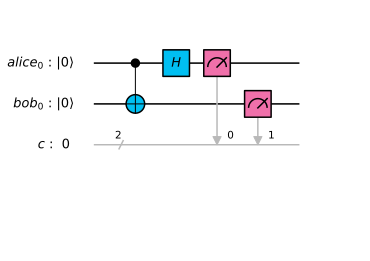

In [3]:
# Bell Measurement
bell_measurement = QuantumCircuit(qa, qb, c)
bell_measurement.cx(qa, qb)
bell_measurement.h(qa)
bell_measurement.measure(qa[0], c[0])
bell_measurement.measure(qb[0], c[1])
circuit_drawer(bell_measurement)

## 2. Dual Bell-CHSH inequality

Let $\mathsf{M}_0$ be a nonlocal observable operator (POVM element).
Here, our problem is to decide whether a given observable is entangled.

We assume each local system is a qubit system.
Alice and Bob prepare two states individually.
Let $\rho^A_i$ and $\rho^B_j$ be Alice's and Bob's quantum states (density operators) respectively.
When Alice and Bob prepare states $\rho^A_i$ and $\rho^B_j$ and perform a nonlocal measurement,
they obtain an outcome $0$ with the probability $\operatorname{tr}\left[\rho^A_i\otimes\rho^B_j\mathsf{M}_0\right]$.


Let's introduce [dual Bell-CHSH inequality](https://arxiv.org/abs/1709.07987) to detect entanglement of observables.
We define a quantity as

$$
D = E(\rho^A_0, \rho^B_0, \mathsf{M}_0) + E(\rho^A_0, \rho^B_1, \mathsf{M}_0) + E(\rho^A_1, \rho^B_0, \mathsf{M}_0) - E(\rho^A_1, \rho^B_1, \mathsf{M}_0),
$$

where $E(\rho^A_i, \rho^B_j, \mathsf{M}_0) = 4 \operatorname{tr}\left[\left(\rho^A_i-\frac{I}{2}\right)\otimes\left(\rho^B_j-\frac{I}{2}\right)\mathsf{M}_0\right]$.
If the given measurement with a condition $\operatorname{tr}\left[\frac{I}{4} \mathsf{M}_0\right]\leq \frac{1}{4}$ is not entangled (separable), the following inequality

$$
-2 \leq D \leq 2
$$

holds.
This inequality is called the dual version of  Bell-CHSH inequality (or dual Bell-CHSH inequality for short).
The original one is a separability criterion for entangled states, but the dual version is a separability criterion for entangled observables.

It is difficult to prepare the completely mixed state $\frac{I}{2}$ directly, so we calculate another form.
For a qubit system, there exists a unique orthogonal state $\left|\psi^\perp\right\rangle$ for each state $\left|\psi\right\rangle$.
It is enough to consider the case the states of each system are pure. (i.e. $\rho^A_i=\left|\psi^A_i\right\rangle\left\langle\psi^A_i\right|$ and $\rho^B_i=\left|\psi^B_i\right\rangle\left\langle\psi^B_i\right|$.)
In this case,

$$
E(\rho^A_i, \rho^B_j, \mathsf{M}_0) = \left\langle\psi^A_i\psi^B_j\middle|\mathsf{M}_0\middle|\psi^A_i\psi^B_j\right\rangle
-\left\langle{\psi^A_i}^\perp\psi^B_j\middle|\mathsf{M}_0\middle|{\psi^A_i}^\perp\psi^B_j\right\rangle
-\left\langle\psi^A_i{\psi^B_j}^\perp\middle|\mathsf{M}_0\middle|\psi^A_i{\psi^B_j}^\perp\right\rangle
+\left\langle{\psi^A_i}^\perp{\psi^B_j}^\perp\middle|\mathsf{M}_0\middle|{\psi^A_i}^\perp{\psi^B_j}^\perp\right\rangle.
$$

Here, we give these states to demonstrate the violation of dual Bell-CHSH inequality ($\left|D\right|>2$).
Alice prepares eigenstates of the following matrices:
$$
Z
= \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix},
$$
and
$$
X
= \begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}.
$$
In a similar way, Bob prepares eigen states of the following matrices:
$$
W = \frac{1}{\sqrt{2}}\left( Z + X \right)
= \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix},
$$
and
$$
V = \frac{1}{\sqrt{2}}\left( Z - X \right)
= \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & -1 \\
-1 & -1
\end{pmatrix}.
$$
We note that eigenstates corresponding to different eigenvalues must be orthogonal.
The quantum circuit of each preparation procedure is given by

In [4]:
alice = {}
bob = {}

# eigenvalue
alice['+'] = QuantumCircuit(qa, qb, c) # do nothing
alice['-'] = QuantumCircuit(qa, qb, c)
alice['-'] .x(qa)

bob['+'] = QuantumCircuit(qa, qb, c) # do nothing
bob['-'] = QuantumCircuit(qa, qb, c)
bob['-'].x(qb)

# matrix
alice['Z'] = QuantumCircuit(qa, qb, c) # do nothing

alice['X'] = QuantumCircuit(qa, qb, c)
alice['X'].h(qa)

bob['W'] = QuantumCircuit(qa, qb, c)
bob['W'].h(qb)  
bob['W'].t(qb)
bob['W'].h(qb)
bob['W'].s(qb)

bob['V'] = QuantumCircuit(qa, qb, c)
bob['V'].h(qb)  
bob['V'].tdg(qb)
bob['V'].h(qb)
bob['V'].s(qb)

Alice prepares an eigenstate of $Z$ with an eigenvalue $+1$ and Bob prepares an eigenstate of $V$ with an eigenvalue $+1$.

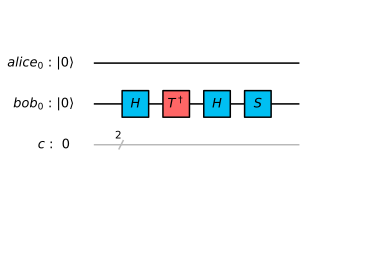

In [5]:
qc = alice['+'] + alice['Z'] + bob['+'] + bob['V']
circuit_drawer(qc)

Alice prepares an eigenstate of $X$ with an eigenvalue $-1$ and Bob prepares an eigenstate of $W$ with an eigenvalue $+1$.

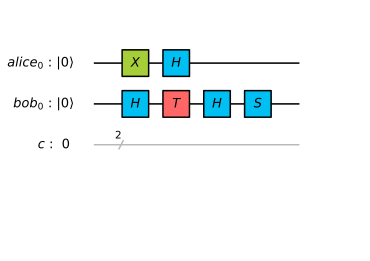

In [6]:
qc = alice['-'] + alice['X'] + bob['+'] + bob['W']
circuit_drawer(qc)

This is the setting of our experiment.

## 3. Violation of the dual Bell-CHSH inequality

Let's show the violation of the dual Bell-CHSH inequality.

A quantum circuit of -X+V.


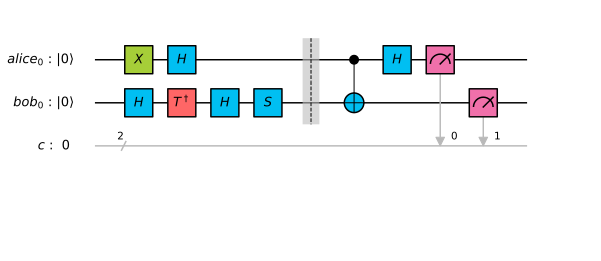

In [7]:
backend = 'local_qasm_simulator'
shots = 1024
circuits = {}

for a_sign, a_basis, b_sign, b_basis in product(['+', '-'], ['Z', 'X'], ['+', '-'], ['V', 'W']):
    name = a_sign + a_basis + b_sign + b_basis
    circuits[name] = QuantumCircuit(qa, qb, c)
    circuits[name] += alice[a_sign]
    circuits[name] += alice[a_basis]
    circuits[name] += bob[b_sign]
    circuits[name] += bob[b_basis]  
    circuits[name].barrier(qa)
    circuits[name].barrier(qb)
    circuits[name] += bell_measurement

# Example
print('A quantum circuit of -X+V.')
circuit_drawer(circuits['-X+V'])

In [8]:
job = execute(circuits.values(), backend=backend, shots=shots)
result = job.result()

First, we have to check which measurement outcome satisfies the condition $\operatorname{tr}\left[\frac{I}{4} \mathsf{M}_0\right]<\frac{1}{4}$.
The completely mixed state $\frac{I}{4}$ can be simulated by the average of all state preparations in current setting.
At least one outcome satisfies this condition.

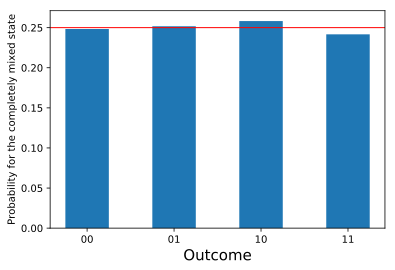

In [9]:
completely_mixed = {'00': 0, '01': 0, '10': 0, '11': 0}
for a_sign, a_basis, b_sign, b_basis in product(['+', '-'], ['Z', 'X'], ['+', '-'], ['V', 'W']):
    name = a_sign + a_basis + b_sign + b_basis
    completely_mixed['00'] += result.average_data(circuits[name], {'00': 1})/16
    completely_mixed['01'] += result.average_data(circuits[name], {'01': 1})/16
    completely_mixed['10'] += result.average_data(circuits[name], {'10': 1})/16
    completely_mixed['11'] += result.average_data(circuits[name], {'11': 1})/16

plt.bar(completely_mixed.keys(), completely_mixed.values(), width=0.5)
plt.xlabel('Outcome', fontsize=15)
plt.ylabel('Probability for the completely mixed state', fontsize=10)
plt.axhline(y=0.25, color='red', linewidth=1)

The following function calculates $$E(\rho^A_i, \rho^B_j, \mathsf{M}_0) = \left\langle\psi^A_i\psi^B_j\middle|\mathsf{M}_0\middle|\psi^A_i\psi^B_j\right\rangle
-\left\langle{\psi^A_i}^\perp\psi^B_j\middle|\mathsf{M}_0\middle|{\psi^A_i}^\perp\psi^B_j\right\rangle
-\left\langle\psi^A_i{\psi^B_j}^\perp\middle|\mathsf{M}_0\middle|\psi^A_i{\psi^B_j}^\perp\right\rangle
+\left\langle{\psi^A_i}^\perp{\psi^B_j}^\perp\middle|\mathsf{M}_0\middle|{\psi^A_i}^\perp{\psi^B_j}^\perp\right\rangle.
$$

In [10]:
def E(result: Result, observable: dict, a_basis: str, b_basis: str) -> float:
    val = 0
    str2int = lambda x: 1 if x == '+' else -1
    for a_sign, b_sign in product(['+', '-'], ['+', '-']):
        name = a_sign + a_basis + b_sign + b_basis
        sign = str2int(a_sign) * str2int(b_sign)
        val += sign * result.average_data(circuits[name], observable)
    return val

Let's calculate
$$
D = E(\rho^A_0, \rho^B_0, \mathsf{M}_0) + E(\rho^A_0, \rho^B_1, \mathsf{M}_0) + E(\rho^A_1, \rho^B_0, \mathsf{M}_0) - E(\rho^A_1, \rho^B_1, \mathsf{M}_0).
$$

We can arbitrarily choose the position of this minus sign.
In the following function, we choose this so that $|D|$ is larger.

In [11]:
def D(result: Result, outcome: str) -> float:
    val = 0
    for a_basis, b_basis in product(['Z', 'X'], ['V', 'W']):
        if outcome[0] == outcome[1] and a_basis == 'X' and b_basis == 'V':
            sign = -1
        elif outcome[0] != outcome[1] and a_basis == 'X' and b_basis == 'W':
            sign = -1
        else:
            sign = 1
        val += sign * E(result, {outcome: 1}, a_basis=a_basis, b_basis=b_basis)
    return val

In [12]:
for outcome in ['00', '01', '10', '11']:
    if completely_mixed[outcome] <= 1/4: # check the condition
        print('D is equal to {} for the outcome {}.'.format(D(result, outcome), outcome))

D is equal to 2.7587890625 for the outcome 00.
D is equal to -2.77734375 for the outcome 11.


If the probability for completely mixed state is equal to of less than $1/4$ and the value $D$ is more than $2$ (or less than $-2$), we now show the existence of an entangled observable!

## 4. Experiment in real Quantum Computer (Optional)

If you want to perform this experiment with a real quantum computer, please run the following codes.

In [13]:
# Connecting to the IBM Quantum Experience
import sys, getpass
try:
    sys.path.append("../../") # go to parent dir
    import Qconfig
    qx_config = {
        "APItoken": Qconfig.APItoken,
        "url": Qconfig.config['url']}
    print('Qconfig loaded from %s.' % Qconfig.__file__)
except:
    APItoken = getpass.getpass('Please input your token and hit enter: ')
    qx_config = {
        "APItoken": APItoken,
        "url":"https://quantumexperience.ng.bluemix.net/api"}
    print('Qconfig.py not found in qiskit-tutorial directory; Qconfig loaded using user input.')

register(qx_config['APItoken'], qx_config['url'])

Please input your token and hit enter: ········
Qconfig.py not found in qiskit-tutorial directory; Qconfig loaded using user input.


In [15]:
device_shots = 1024
device_name = least_busy(available_backends({'simulator': False, 'local': False}))
device = get_backend(device_name)
device_coupling = device.configuration['coupling_map']

print("the best backend is " + device_name + " with coupling " + str(device_coupling))

the best backend is ibmqx5 with coupling [[1, 0], [1, 2], [2, 3], [3, 4], [3, 14], [5, 4], [6, 5], [6, 7], [6, 11], [7, 10], [8, 7], [9, 8], [9, 10], [11, 10], [12, 5], [12, 11], [12, 13], [13, 4], [13, 14], [15, 0], [15, 2], [15, 14]]


In [ ]:
job = execute(circuits.values(), backend=device_name, shots=device_shots)
result = job.result()

completely_mixed = {'00': 0, '01': 0, '10': 0, '11': 0}
for a_sign, a_basis, b_sign, b_basis in product(['+', '-'], ['Z', 'X'], ['+', '-'], ['V', 'W']):
    name = a_sign + a_basis + b_sign + b_basis
    completely_mixed['00'] += result.average_data(circuits[name], {'00': 1})/16
    completely_mixed['01'] += result.average_data(circuits[name], {'01': 1})/16
    completely_mixed['10'] += result.average_data(circuits[name], {'10': 1})/16
    completely_mixed['11'] += result.average_data(circuits[name], {'11': 1})/16

plt.bar(completely_mixed.keys(), completely_mixed.values(), width=0.5)
plt.xlabel('Outcome', fontsize=15)
plt.ylabel('Probability for the completely mixed state', fontsize=10)
plt.axhline(y=0.25, color='red', linewidth=1)

for outcome in ['00', '01', '10', '11']:
    if completely_mixed[outcome] <= 1/4: # check the condition
        print('D is equal to {} for the outcome {}.'.format(D(result, outcome), outcome))

## References

For more details, please see the original paper including an application to quantum teleportation and generalization to a higher-dimensional Hilbert space.
* [IH, "Separability criterion for quantum effects" in press in PLA](https://doi.org/10.1016/j.physleta.2018.06.043)